<a href="https://colab.research.google.com/github/michal00x/Plot/blob/main/relplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

'''
x = np.linspace(0,20,100)
y = np.random.randn(100,4)
y = np.cumsum(y, axis=0)
plt.plot(x,y)
'''

df=sns.load_dataset('tips')
'''
df.info()
df.describe(include=['category'])
'''

sns.set(palette='pastel')
sns.relplot(data=df,x='total_bill', y='tip', size='sex',hue='size', sizes=(10,200),style='size',
            palette='viridis',col='time',row='smoker')

@_deprecate_positional_args def relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)

In [32]:
df=sns.load_dataset('fmri')
df.head(2)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


AttributeError: ignored

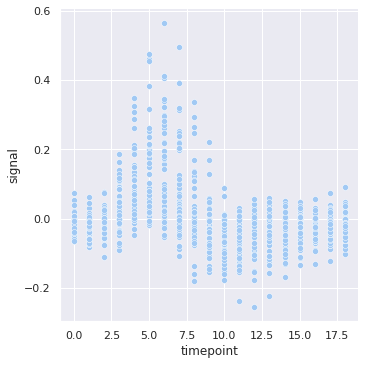

In [33]:
sns.relplot(data=df, x='timepoint',y='signal')
